In [1]:
import wave
import matplotlib.pyplot as plt
import numpy as np
import os

In [10]:
def plot_yuputu(audio):
    #绘制频谱
    f = wave.open(audio, 'rb')
    params = f.getparams()
    nchannels, sampwidth, framerate, nframes = params[:4]
    strData = f.readframes(nframes)#读取音频，字符串格式
    waveData = np.fromstring(strData,dtype=np.int16)
    
    print("plotting spectrogram...")
    framelength = 0.025 #帧长20~30ms
    framesize = framelength*16000 #每帧点数 N = t*fs,通常情况下值为256或512,要与NFFT相等\
                                        #而NFFT最好取2的整数次方,即framesize最好取的整数次方

    #找到与当前framesize最接近的2的正整数次方
    nfftdict = {}
    lists = [32,64,128,256,512,1024]
    for i in lists:
        nfftdict[i] = abs(framesize - i)
    sortlist = sorted(nfftdict.items(), key=lambda x: x[1])#按与当前framesize差值升序排列
    framesize = int(sortlist[0][0])#取最接近当前framesize的那个2的正整数次方值为新的framesize

    NFFT = framesize #NFFT必须与时域的点数framsize相等，即不补零的FFT
    overlapSize = 1.0/3 * framesize #重叠部分采样点数overlapSize约为每帧点数的1/3~1/2
    overlapSize = int(round(overlapSize))#取整
    waveData = np.reshape(waveData,[nframes,nchannels]).T
    spectrum,freqs,ts,fig = plt.specgram(waveData[0],NFFT = NFFT,Fs =framerate,window=np.hanning(M = framesize),
                                         noverlap=overlapSize,mode='default',scale_by_freq=True,sides='default',
                                         scale='dB',xextent=None)#绘制频谱图 
    print(waveData[0],  framesize)
    #print(ts* 1000)
    print(np.mean(ts) *1000, np.median(ts)*1000)
    plt.ylabel('Frequency')
    plt.xlabel('Time(s)')
    plt.title('Spectrogram')

plotting spectrogram...
[1743 1397 1087 ...  882  674 -409] 512
2488.25 2488.25


D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


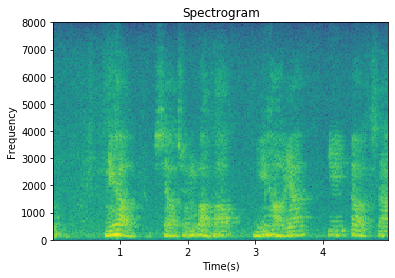

In [11]:
plot_yuputu('audio_wav3/xiefei_a5/xiefei_a51585792516.wav')